In [1]:
# Imports
import networkx as nx
import numpy as np
import matplotlib.pylab as plt


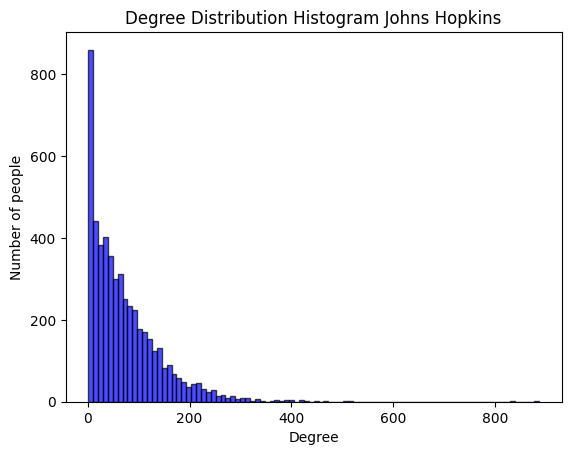

In [7]:
# Question 2.a
# Plotting the degree distribution of 3 networks : Caltech, MIT and Johns Hopkins

GCaltech = nx.read_gml("../data/Caltech36.gml")
GMIT = nx.read_gml("../data/MIT8.gml")

GHopkins = nx.read_gml("../data/Johns Hopkins55.gml")

""" print(len(GCaltech.nodes()))
print(len(GMIT.nodes()))
print(len(GHopkins.nodes()))
 """

def plotDegreeDistribution(G):
    """ degree = [v for k,v in dict(G.degree()).items()]
    distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    k,pk = zip(*distribution)
    PDF = np.array(pk)/sum(pk)
    CCDF = 1-np.cumsum(PDF) 

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16/2,9/2))
    ax1.loglog(k, PDF, 'ro')
    ax1.set_xlabel("$k$ Degree")
    ax1.set_ylabel("$P_k$")
    ax1.set_title("PDF")

    ax2.loglog(k, CCDF, 'ro')
    ax2.set_ylim(1e-4,1.1)
    ax2.set_xlim(1,2e3)
    ax2.set_xlabel("$k$ Degree")
    ax2.set_ylabel("$1-P[K > k]$")
    ax2.set_title("CCDF")
    fig.tight_layout() """
    degrees = dict(G.degree())
    degree_values = list(degrees.values())

    # Plot the histogram
    plt.hist(degree_values, bins='auto', alpha=0.7, color='b', edgecolor='black')
    plt.title("Degree Distribution Histogram Johns Hopkins")
    plt.xlabel("Degree")
    plt.ylabel("Number of people")
    plt.savefig("../Q2/degree_distribution_Hopkins")
    plt.show()

plotDegreeDistribution(GHopkins)


In [3]:
# Question 2.b
# Compute global clustering coefficient and mean local clustering coefficient
# Compute the edge density

clusteringCoeffCaltech = nx.average_clustering(GCaltech)
clusteringCoeffMIT = nx.average_clustering(GMIT)
clusteringCoeffHopkins = nx.average_clustering(GHopkins)

print("clustering coef Caltech : ", clusteringCoeffCaltech)
print("clustering coef MIT : ",     clusteringCoeffMIT)
print("clustering coef Hopkins : ", clusteringCoeffHopkins)

densityCaltech = nx.density(GCaltech)
densityMIT = nx.density(GMIT)
densityHopkins = nx.density(GHopkins)

print("Density Caltech : ", densityCaltech)
print("Density MIT : ",     densityMIT)
print("Density Hopkins : ", densityHopkins)


# Density very low -> one person taken randomly in this graph has very low probability of knowing a lot of people
# Clustering coef relatively low -> in majority, people don't form perfect cluster (The people I know usually don't know all the people I know. This coef is between 0.2 and 0.4 which is not terrible after all : represents well real life friends group)


clustering coef Caltech :  0.40929439048517247
clustering coef MIT :  0.2712187419501315
clustering coef Hopkins :  0.26839307371293525
Density Caltech :  0.05640442132639792
Density MIT :  0.012118119495041378
Density Hopkins :  0.013910200162372396


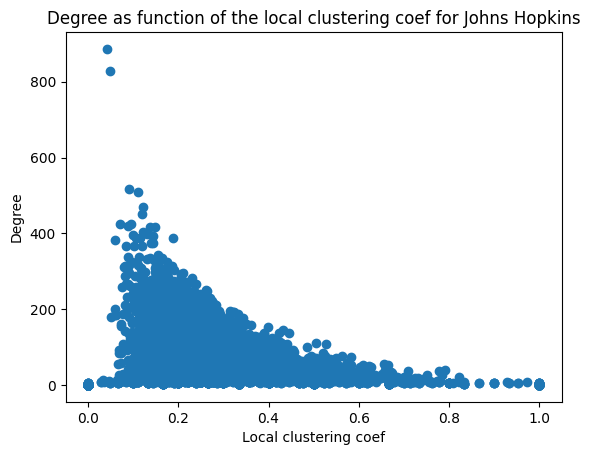

In [11]:
# Question 2.c
# Plot the scatter plot of the degree in regards to the local clustering coef


def plotDegreeLocalClustering(G):
    clustering = nx.clustering(G)
    clusteringCoefs = list(clustering.values())
    
    degrees = dict(G.degree())
    degree_values = list(degrees.values())

    plt.scatter(clusteringCoefs, degree_values, marker = "o")
    plt.ylabel("Degree")
    plt.xlabel("Local clustering coef")
    plt.title("Degree as function of the local clustering coef for Johns Hopkins")
    plt.savefig("../Q2/degree_function_local_clustering_Hopkins")
#plotDegreeLocalClustering(GCaltech)
plotDegreeLocalClustering(GHopkins)
#plotDegreeLocalClustering(GHopkins)

# The more the degree increases the higher the more likely the person is to not be part of a local cluster. Thoses ppl can be faculty members, professors, staff, board members etc. They know a lot of ppl (high degree) but ofc all the ppl they know usually don't know each other
# Only ppl with a low degree can achieve a local high local cluster coefficient : in universities, ther are for example small group of friends that are very bounded and do not know a lot of other ppl.
# At a low degree, ppl can have any local clustering coeff : some ppl don't have a close group of friends and still don't know a lot of people. 


In [5]:
# Question 3.a
# Assortativity
""" print("Assortativity student fac")
print("Gcaltech", nx.attribute_assortativity_coefficient(GCaltech, "student_fac"))
print("GMIT", nx.attribute_assortativity_coefficient(GMIT, "student_fac"))
print("GHopkins", nx.attribute_assortativity_coefficient(GHopkins, "student_fac"))

print("\n\nAssortativity major")
print("Gcaltech", nx.attribute_assortativity_coefficient(GCaltech, "major_index"))
print("GMIT", nx.attribute_assortativity_coefficient(GMIT, "major_index"))
print("GHopkins", nx.attribute_assortativity_coefficient(GHopkins, "major_index"))

print("\n\nAssortativity vertex degree")
print("Gcaltech", nx.degree_assortativity_coefficient(GCaltech))
print("GMIT", nx.degree_assortativity_coefficient(GMIT))
print("GHopkins", nx.degree_assortativity_coefficient(GHopkins))

print("\n\nAssortativity dorm")
print("Gcaltech", nx.attribute_assortativity_coefficient(GCaltech, "dorm"))
print("GMIT", nx.attribute_assortativity_coefficient(GMIT, "dorm"))
print("GHopkins", nx.attribute_assortativity_coefficient(GHopkins, "dorm"))

print("\n\nAssortativity gender")
print("Gcaltech", nx.attribute_assortativity_coefficient(GCaltech, "gender"))
print("GMIT", nx.attribute_assortativity_coefficient(GMIT, "gender"))
print("GHopkins", nx.attribute_assortativity_coefficient(GHopkins, "gender"))
 """
# On all graphs !

import os
import pickle
def get_graphs_tab():

    # LOAD GRAPHS VARIABLE IF SAVED
    if os.path.exists('../Q3/graphs.pkl'):
        with open('../Q3/graphs.pkl', 'rb') as f:
            graphs = pickle.load(f)
            size_graphs = [len(graph.nodes()) for graph in graphs]
            file_names = [file for file in files if os.path.isfile(os.path.join(directory, file))]


    # COMPUTE IF NO EXISTING GRAPHS
    else : 
        size_graphs = []
        graphs = []
        directory = "../data/"
        files = os.listdir(directory)
        file_names = [file for file in files if os.path.isfile(os.path.join(directory, file))]

        iter = 0
        for file_name in file_names:
            
            #if(iter < 5):
            graph = nx.read_gml(directory + file_name)
            graphs.append(graph)
            size_graphs.append(len(graph.nodes()))
            iter+=1

        # SAVE GRAPHS VARIABLE
        with open('../Q3/graphs.pkl', 'wb') as f:
            pickle.dump(graphs, f)

    print(nx.degree_assortativity_coefficient(graphs[0]))
    print("number of graphs: ", len(file_names))
    return graphs, size_graphs


student_fac_assortativity = []
major_assortativity = []
degree_assortativity = []
dorm_assortativity = []
gender_assortativity = []

def compute_assortativity_graphs():
    for graph in graphs:
        student_fac_assortativity.append(nx.attribute_assortativity_coefficient(graph, "student_fac"))
        major_assortativity.append(nx.attribute_assortativity_coefficient(graph, "major_index"))
        degree_assortativity.append(nx.degree_assortativity_coefficient(graph))
        dorm_assortativity.append(nx.attribute_assortativity_coefficient(graph, "dorm"))
        gender_assortativity.append(nx.attribute_assortativity_coefficient(graph, "gender"))
    
graphs, size_graphs = get_graphs_tab()
compute_assortativity_graphs()


0.056204574545371214
number of graphs:  100


In [9]:
# SAVE GRAPHS VARIABLE
import pickle
with open('../Q3/graphs.pkl', 'wb') as f:
    pickle.dump(graphs, f)

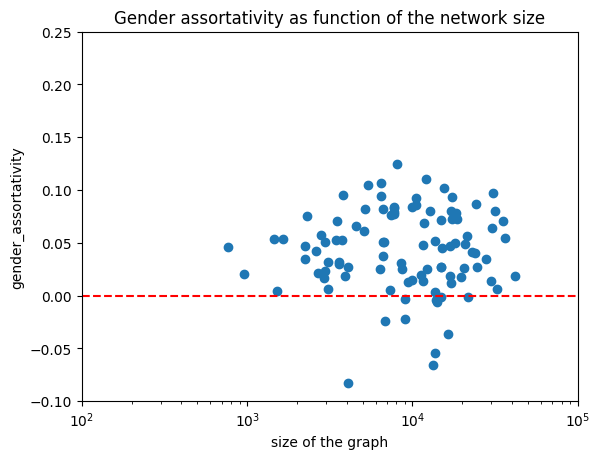

In [59]:
## SCATTER PLOTS
""" plt.ylabel("student_fac_assortativity")
plt.xlabel("size of the graph")
plt.title('Student_fac assortativity as function of the network size')
plt.xscale('log')
plt.xlim(10**2, 10**5)
plt.ylim(0, 0.7)
plt.scatter(size_graphs, student_fac_assortativity) 
plt.savefig('../Q3/scatter_student_fac_assortativity') """

""" 
plt.ylabel("major_assortativity")
plt.xlabel("size of the graph")
plt.title('Major assortativity as function of the network size')
plt.xscale('log')
plt.xlim(10**2, 10**5)
plt.ylim(0, 0.2)
plt.scatter(size_graphs, major_assortativity) 
plt.savefig('../Q3/scatter_major_assortativity')
"""

""" 
plt.ylabel("degree_assortativity")
plt.xlabel("size of the graph")
plt.title('Degree assortativity as function of the network size')
plt.xscale('log')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlim(10**2, 10**5)
plt.ylim(-0.2, 0.4)
plt.scatter(size_graphs, degree_assortativity) 
plt.savefig('../Q3/scatter_degree_assortativity') """



""" plt.ylabel("dorm_assortativity")
plt.xlabel("size of the graph")
plt.title('Dorm assortativity as function of the network size')
plt.xscale('log')
plt.xlim(10**2, 10**5)
plt.ylim(0, 0.5)
plt.scatter(size_graphs, dorm_assortativity) 
plt.savefig('../Q3/scatter_dorm_assortativity')
"""

plt.ylabel("gender_assortativity")
plt.xlabel("size of the graph")
plt.title('Gender assortativity as function of the network size')
plt.xscale('log')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlim(10**2, 10**5)
plt.ylim(-0.10, 0.25)
plt.scatter(size_graphs, gender_assortativity) 
plt.savefig('../Q3/scatter_gender_assortativity') 

 

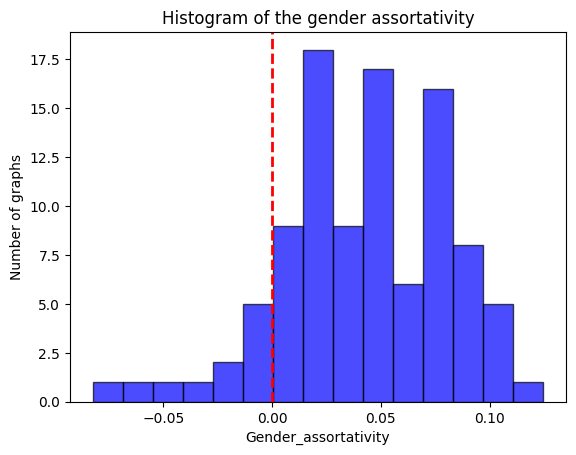

In [57]:
## HISTOGRAMS
""" plt.hist(student_fac_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Student_fac_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the student_fac assortativity')
plt.savefig('../Q3/hist_student_fac_assortativity')
plt.show()
"""

""" 
plt.hist(dorm_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Dorm_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the dorm assortativity')
plt.savefig('../Q3/hist_dorm_assortativity')
plt.show() 
"""

 
""" plt.hist(degree_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Degree_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the degree assortativity')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.savefig('../Q3/hist_degree_assortativity')
plt.show()  """

""" plt.hist(major_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('major_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the major assortativity')
plt.savefig('../Q3/hist_major_assortativity')
plt.show() """



plt.hist(gender_assortativity, bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Gender_assortativity')
plt.ylabel('Number of graphs')
plt.title('Histogram of the gender assortativity')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.savefig('../Q3/hist_gender_assortativity')
plt.show()
 